CASTHPI (ARIMA, T&S)
CCI (T&S)
MORTGAGE US (T&S)

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
files.upload()

Saving CASTHPI (1).csv to CASTHPI (1).csv
Saving cdph-positive-test-rate (1).csv to cdph-positive-test-rate (1).csv
Saving DP_LIVE_17052021163948920 (1).csv to DP_LIVE_17052021163948920 (1).csv
Saving MORTGAGE30US (1).csv to MORTGAGE30US (1).csv


{'CASTHPI (1).csv': b'DATE,CASTHPI\n1975-01-01,41.66\n1975-04-01,42.74\n1975-07-01,44.29\n1975-10-01,45.84\n1976-01-01,47.83\n1976-04-01,50.26\n1976-07-01,53.57\n1976-10-01,55.57\n1977-01-01,58.03\n1977-04-01,62.99\n1977-07-01,67.94\n1977-10-01,70.66\n1978-01-01,73.22\n1978-04-01,76.0\n1978-07-01,78.61\n1978-10-01,81.76\n1979-01-01,84.84\n1979-04-01,88.61\n1979-07-01,93.09\n1979-10-01,96.42\n1980-01-01,100.00\n1980-04-01,102.85\n1980-07-01,106.57\n1980-10-01,108.44\n1981-01-01,110.46\n1981-04-01,112.93\n1981-07-01,116.35\n1981-10-01,117.56\n1982-01-01,104.66\n1982-04-01,107.58\n1982-07-01,105.12\n1982-10-01,115.9\n1983-01-01,116.78\n1983-04-01,117.48\n1983-07-01,117.32\n1983-10-01,117.85\n1984-01-01,119.56\n1984-04-01,120.17\n1984-07-01,121.75\n1984-10-01,122.85\n1985-01-01,124.59\n1985-04-01,126.4\n1985-07-01,129.23\n1985-10-01,130.64\n1986-01-01,132.33\n1986-04-01,134.87\n1986-07-01,137.84\n1986-10-01,141.2\n1987-01-01,144.81\n1987-04-01,148.36\n1987-07-01,153.05\n1987-10-01,157.39\n

In [ ]:
# Import data
dfHPI = pd.read_csv('/content/CASTHPI (1).csv')
dfHPI.head

<bound method NDFrame.head of            DATE  CASTHPI
0    1975-01-01    41.66
1    1975-04-01    42.74
2    1975-07-01    44.29
3    1975-10-01    45.84
4    1976-01-01    47.83
..          ...      ...
180  2020-01-01   671.54
181  2020-04-01   679.13
182  2020-07-01   686.56
183  2020-10-01   700.11
184  2021-01-01   718.34

[185 rows x 2 columns]>

In [ ]:
dfHPI.dtypes

DATE        object
CASTHPI    float64
dtype: object

In [ ]:
import datetime
dfHPI['DATE'] = pd.to_datetime(dfHPI['DATE'], format='%Y-%m-%d')

In [ ]:
dfHPI.dtypes

DATE       datetime64[ns]
CASTHPI           float64
dtype: object

In [ ]:
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})

**Finding (d)**

In [ ]:
#check if the series is stationary using the Augmented Dickey Fuller test
#differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.
#The null hypothesis of the ADF test is that the time series is non-stationary

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(dfHPI['CASTHPI'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.028599
p-value: 0.956102


Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like

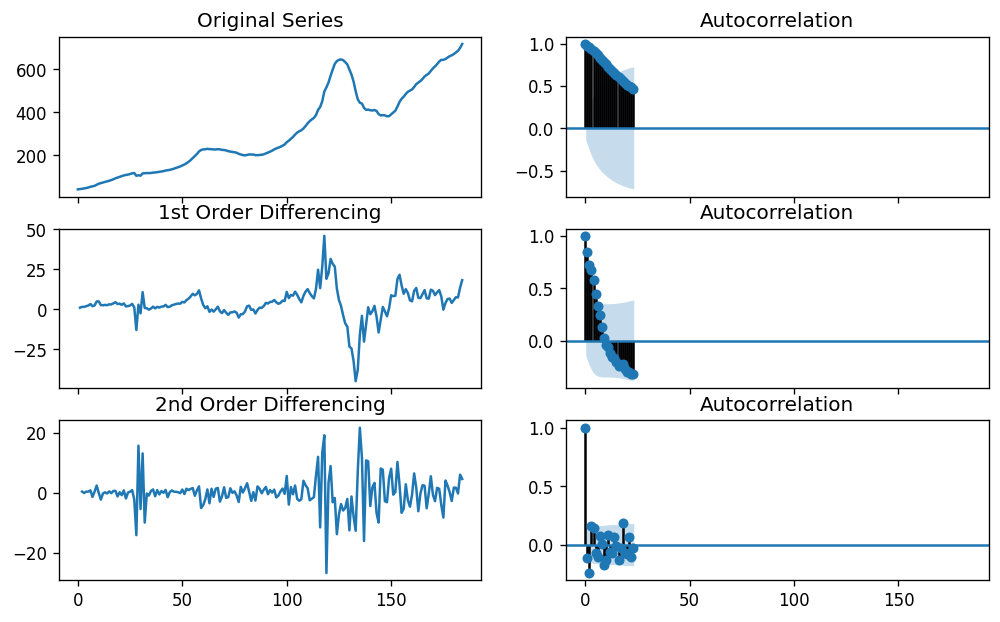

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(dfHPI['CASTHPI']); axes[0, 0].set_title('Original Series')
plot_acf(dfHPI['CASTHPI'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(dfHPI['CASTHPI'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(dfHPI['CASTHPI'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(dfHPI['CASTHPI'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(dfHPI['CASTHPI'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

For the above series, the time series reaches stationarity with two orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.

So, I am going to tentatively fix the order of differencing as 1 even though the series is not perfectly stationary (weak stationarity)

**Finding (p)**


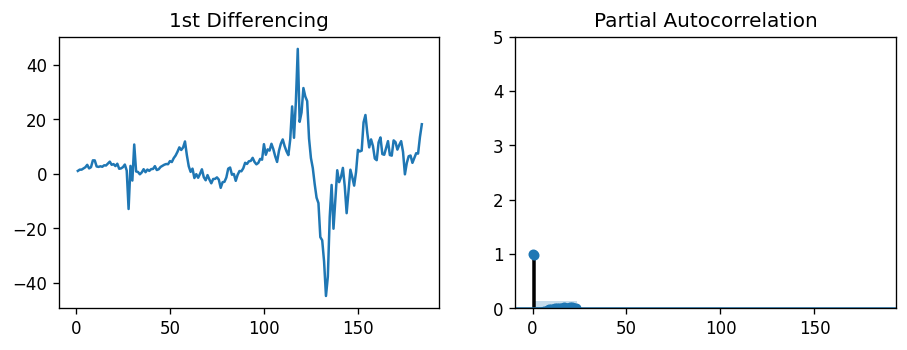

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(dfHPI['CASTHPI'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(dfHPI['CASTHPI'].dropna(), ax=axes[1])

plt.show()

**Finding (q)**


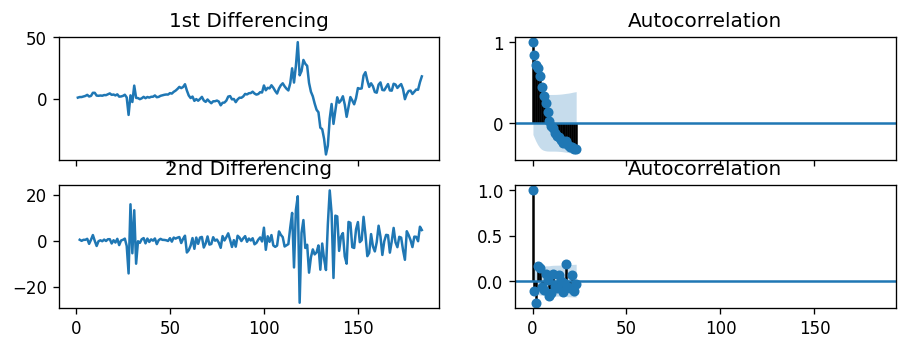

In [ ]:
#autocorrelation plot of the differenced series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=True)

axes[0,0].plot(dfHPI['CASTHPI'].diff()); axes[0,0].set_title('1st Differencing')
plot_acf(dfHPI['CASTHPI'].diff().dropna(), ax=axes[0, 1])

# 2nd Differencing
axes[1, 0].plot(dfHPI['CASTHPI'].diff().diff()); axes[1, 0].set_title('2nd Differencing')
plot_acf(dfHPI['CASTHPI'].diff().diff().dropna(), ax=axes[1, 1])


plt.show()

We can found that q = 2

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(dfHPI['CASTHPI'], order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.CASTHPI   No. Observations:                  184
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -566.567
Method:                       css-mle   S.D. of innovations              5.242
Date:                Sat, 12 Jun 2021   AIC                           1143.134
Time:                        13:48:50   BIC                           1159.208
Sample:                             1   HQIC                          1149.649
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.0853      2.837      1.440      0.152      -1.476       9.646
ar.L1.D.CASTHPI     0.8927      0.040     22.456      0.000       0.815       0.971
ma.L1.D.CASTHPI    -0.0263      

To compare MA1 and MA2, we may create both and compare

In [ ]:
# 1,1,1 ARIMA Model
model = ARIMA(dfHPI['CASTHPI'], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.CASTHPI   No. Observations:                  184
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -568.723
Method:                       css-mle   S.D. of innovations              5.304
Date:                Sat, 12 Jun 2021   AIC                           1145.446
Time:                        13:49:16   BIC                           1158.305
Sample:                             1   HQIC                          1150.658
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.0616      2.660      1.527      0.129      -1.153       9.276
ar.L1.D.CASTHPI     0.8684      0.046     18.875      0.000       0.778       0.959
ma.L1.D.CASTHPI    -0.0748      

Both model cant even give significant p-value even already adjusted by finding proper p, d, and q
Hence, we may check the distribution of residuals.
It is found that residuals near zero and normally distributed which is good

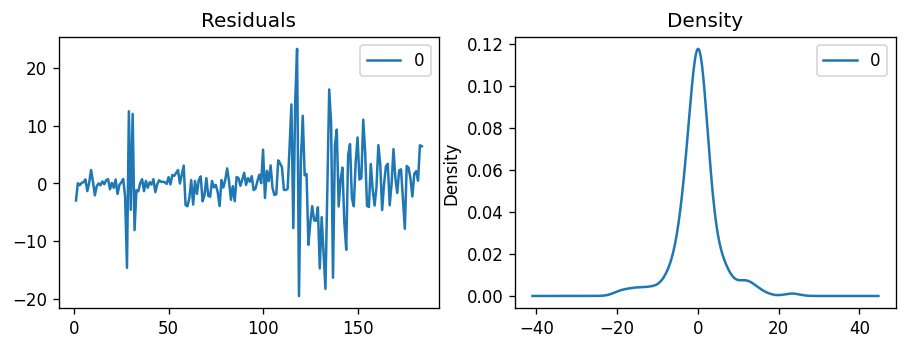

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Further, we can test the model to get better insight more than statistical results

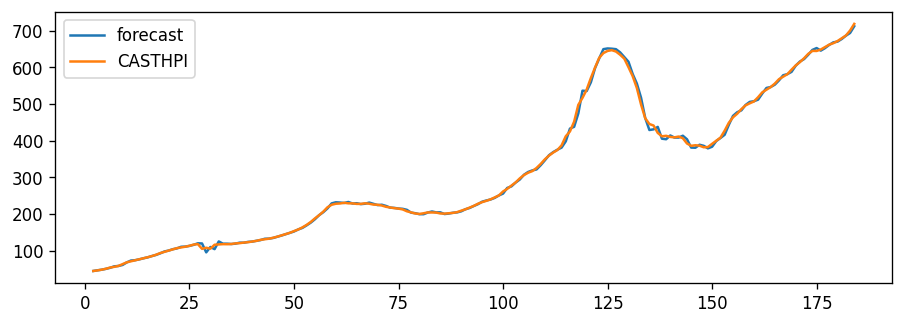

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

**Trying using cross-validation**

In [ ]:
# Create Training and Test
train = dfHPI['CASTHPI'][:150]
test = dfHPI['CASTHPI'][150:]

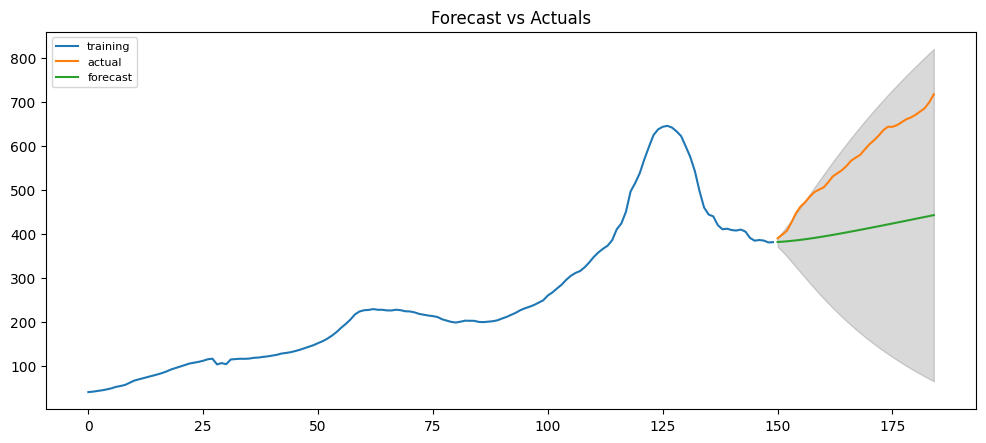

In [ ]:
# Build Model  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)

# Forecast
fc, se, conf = fitted.forecast(35, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:             D2.CASTHPI   No. Observations:                  148
Model:                 ARIMA(4, 2, 2)   Log Likelihood                -457.544
Method:                       css-mle   S.D. of innovations              5.150
Date:                Sat, 12 Jun 2021   AIC                            931.087
Time:                        14:10:14   BIC                            955.065
Sample:                             2   HQIC                           940.829
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0166      0.022      0.763      0.447      -0.026       0.059
ar.L1.D2.CASTHPI     1.6882      0.082     20.575      0.000       1.527       1.849
ar.L2.D2.CASTHPI    -0.7686 

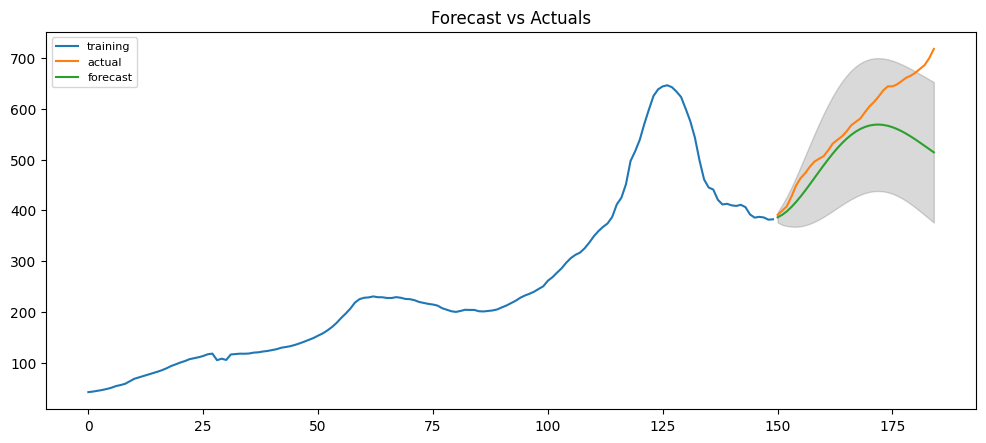

In [ ]:
model = ARIMA(train, order=(4, 2, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(35, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


Notes: this is the model author can find by searching from 1-4

In [ ]:
from statsmodels.tsa.stattools import acf
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

#> {'mape': 0.02250131357314834,
#>  'me': 3.230783108990054,
#>  'mae': 4.548322194530069,
#>  'mpe': 0.016421001932706705,
#>  'rmse': 6.373238534601827,
#>  'acf1': 0.5105506325288692,
#>  'corr': 0.9674576513924394,
#>  'minmax': 0.02163154777672227}

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'acf1': 0.863110923439212,
 'corr': 0.8439802196345816,
 'mae': 57.931969597603704,
 'mape': 0.09276596588409661,
 'me': -57.931969597603704,
 'minmax': 0.09276596588409658,
 'mpe': -0.09276596588409661,
 'rmse': 78.59297851073318}

by MAPE, the model accuracy is 90.8% which is good

**Trend and Seasonality**


*   House Price Index
*   Mortgage
*   CCI



In [ ]:
from google.colab import files
files.upload()

Saving DP_LIVE_17052021163948920 - DP_LIVE_17052021163948920.csv to DP_LIVE_17052021163948920 - DP_LIVE_17052021163948920.csv


{'DP_LIVE_17052021163948920 - DP_LIVE_17052021163948920.csv': b'LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1960-01,101.7499\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1960-02,101.4544\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1960-03,101.1992\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1960-04,101.0584\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1960-05,101.0939\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1960-06,101.1945\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1960-07,101.2158\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1960-08,101.0551\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1960-09,100.8059\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1960-10,100.599\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1960-11,100.5319\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1960-12,100.5561\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1961-01,100.6118\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1961-02,100.6711\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1961-03,100.7501\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1961-04,100.8897\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1961-05,101.1176\r\nUSA,CCI,AMPLITUD,LTRENDIDX,M,1961-06,101.3489

In [ ]:
dfCCI = pd.read_csv('/content/DP_LIVE_17052021163948920 - DP_LIVE_17052021163948920.csv')
dfMR = pd.read_csv('/content/MORTGAGE30US (1).csv')

In [ ]:
dfCCI.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-01,101.7499
1,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-02,101.4544
2,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-03,101.1992
3,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-04,101.0584
4,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-05,101.0939


In [ ]:
dfCCI.drop(columns=['LOCATION', 'INDICATOR','SUBJECT','MEASURE','FREQUENCY'])
dfCCI2 = dfCCI.drop(columns=['LOCATION', 'INDICATOR','SUBJECT','MEASURE','FREQUENCY'])

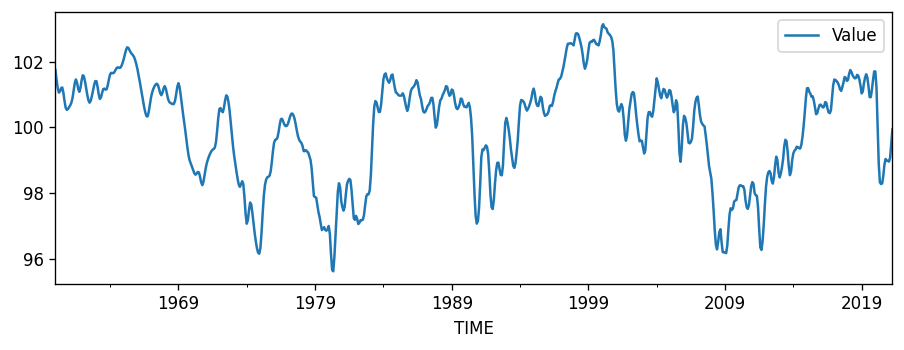

In [ ]:
dfCCI2.set_index('TIME',inplace=True)
dfCCI2.index=pd.to_datetime(dfCCI2.index)
 
#drop null values
dfCCI2.dropna(inplace=True)
 
dfCCI2.plot()

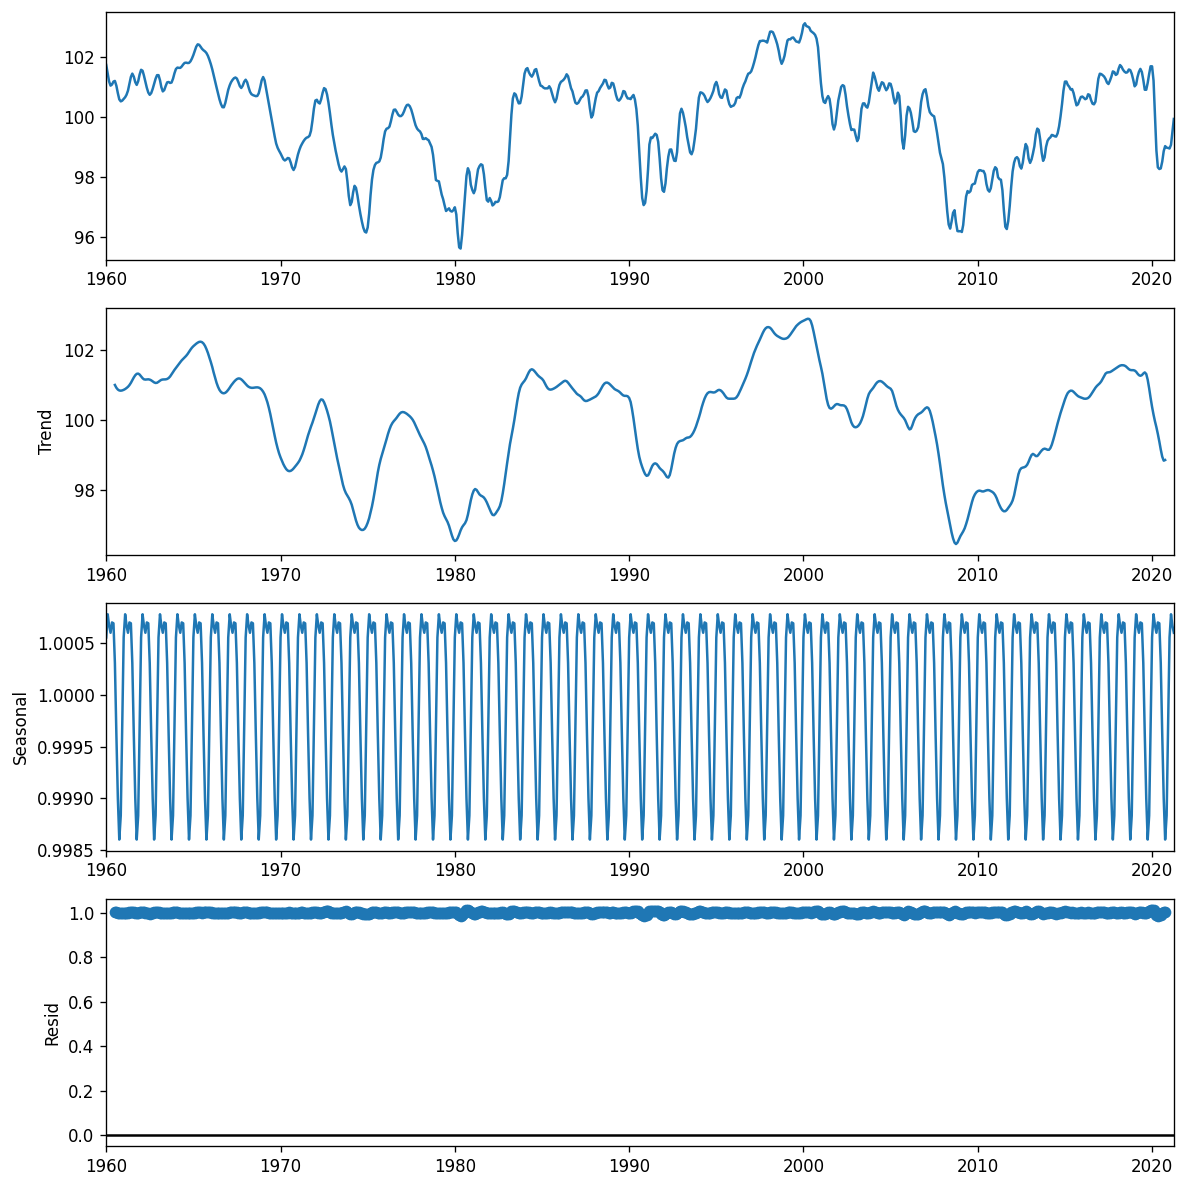

In [ ]:
result = seasonal_decompose(dfCCI2, model='multiplicative')
result.plot()
from pylab import rcParams
rcParams['figure.figsize'] = 10, 20
plt.show()

In [ ]:
dfMR = pd.read_csv('/content/MORTGAGE30US (1).csv')
dfMR.dtypes

DATE             object
MORTGAGE30US    float64
dtype: object

In [ ]:
dfMR

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29
...,...,...
2611,2021-04-15,3.04
2612,2021-04-22,2.97
2613,2021-04-29,2.98
2614,2021-05-06,2.96


In [ ]:
dfMR['DATE'] = pd.to_datetime(dfMR['DATE'], format='%Y-%m-%d')
dfMR.set_index('DATE',inplace=True)
dfMR.index=pd.to_datetime(dfMR.index)
 
#drop null values
dfMR.dropna(inplace=True)



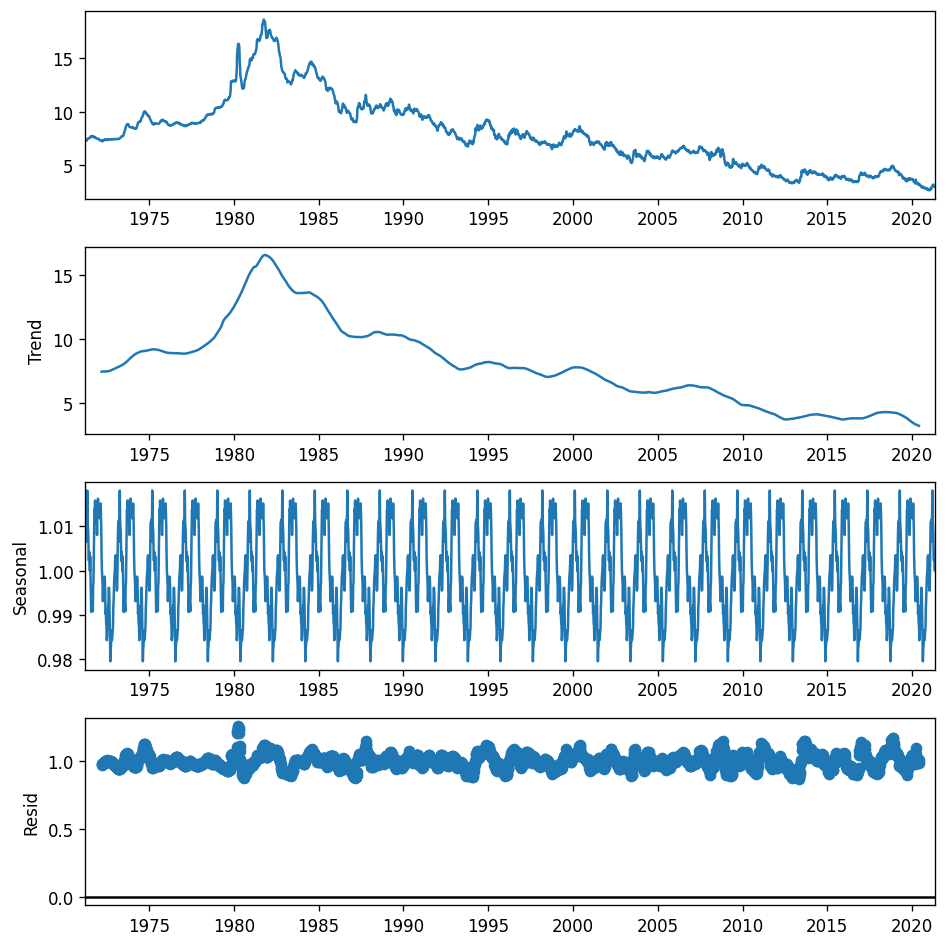

In [ ]:
result = seasonal_decompose(dfMR, model='multiplicative', period=100)
result.plot()
from pylab import rcParams
rcParams['figure.figsize'] = 10,10
plt.show()